# Allometric Growth Model (Huxley's Law)

Allometric growth describes the relative growth rates of two parts of an organism (or a part vs the whole). It is fundamental in biology for understanding scaling laws.

### 1. The Differential Equation
The model is derived from the assumption that the specific growth rate of a part ($y$) is proportional to the specific growth rate of the whole ($x$):

$$\frac{1}{y} \frac{dy}{dt} = \alpha \frac{1}{x} \frac{dx}{dt}$$

By rearranging terms ($\frac{dy}{y} = \alpha \frac{dx}{x}$) and integrating, we get the famous **Power Law**:

$$y = b x^{\alpha}$$

Where:
* $y$: Size of the specific organ (e.g., brain mass).
* $x$: Size of the whole organism (e.g., body mass).
* $\alpha$: The **Allometric Coefficient** (Scaling exponent).
* $b$: Integration constant (intercept).

### 2. Types of Allometry
The behavior depends entirely on $\alpha$:
* **$\alpha = 1$ (Isometry):** The part grows at the same rate as the body. Shape remains constant (e.g., human heart size vs body size).
* **$\alpha > 1$ (Positive/Hyper-Allometry):** The part grows *faster* than the body (e.g., Fiddler crab claw).
* **$\alpha < 1$ (Negative/Hypo-Allometry):** The part grows *slower* than the body (e.g., human head size vs body size).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def allometric_equation(x, b, alpha):
    """
    y = b * x^alpha
    """
    return b * (x ** alpha)

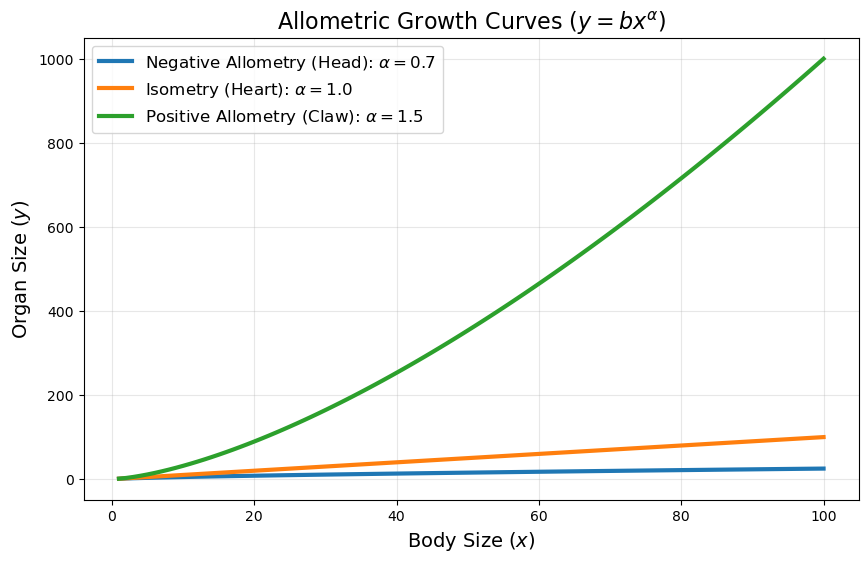

In [2]:
x_body = np.linspace(1, 100, 100) # Body mass from 1 to 100 arbitrary units
b = 1.0                           # Normalization constant

alphas = {
    'Negative Allometry (Head)': 0.7,  # Grows slower than body
    'Isometry (Heart)': 1.0,           # Grows same as body
    'Positive Allometry (Claw)': 1.5   # Grows faster than body
}

fig, ax = plt.subplots(figsize=(10, 6))

for name, alpha in alphas.items():
    y_organ = allometric_equation(x_body, b, alpha)
    ax.plot(x_body, y_organ, linewidth=3, label=f'{name}: $\\alpha={alpha}$')

ax.set_title('Allometric Growth Curves ($y = bx^{\\alpha}$)', fontsize=16)
ax.set_xlabel('Body Size ($x$)', fontsize=14)
ax.set_ylabel('Organ Size ($y$)', fontsize=14)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)

plt.show()

### Log Log Plot
The most important visualization for allometry is the Log-Log plot. If data follows a power law, it becomes a straight line on a log-log scale.$$\ln(y) = \alpha \ln(x) + \ln(b)$$

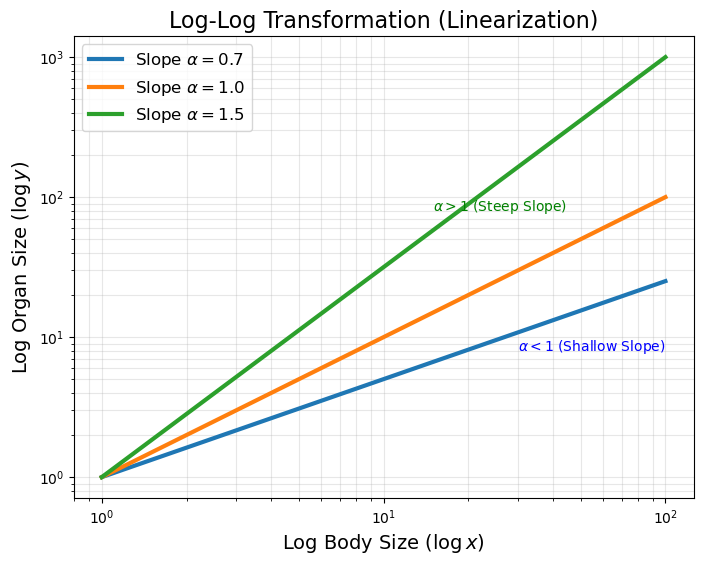

In [3]:
fig, ax = plt.subplots(figsize=(8, 6))

for name, alpha in alphas.items():
    y_organ = allometric_equation(x_body, b, alpha)
    ax.loglog(x_body, y_organ, linewidth=3, label=f'Slope $\\alpha={alpha}$')

ax.text(15, 80, r'$\alpha > 1$ (Steep Slope)', fontsize=10, color='green')
ax.text(30, 8, r'$\alpha < 1$ (Shallow Slope)', fontsize=10, color='blue')

ax.set_title('Log-Log Transformation (Linearization)', fontsize=16)
ax.set_xlabel('Log Body Size ($\log x$)', fontsize=14)
ax.set_ylabel('Log Organ Size ($\log y$)', fontsize=14)
ax.legend(fontsize=12)
ax.grid(True, which="both", ls="-", alpha=0.3)

plt.show()

### Ratio Analysis (Shape Change)
A key feature of allometry is that the ratio of organ size to body size ($y/x$) changes as the organism grows (unless $\alpha=1$). This implies a change in body shape.

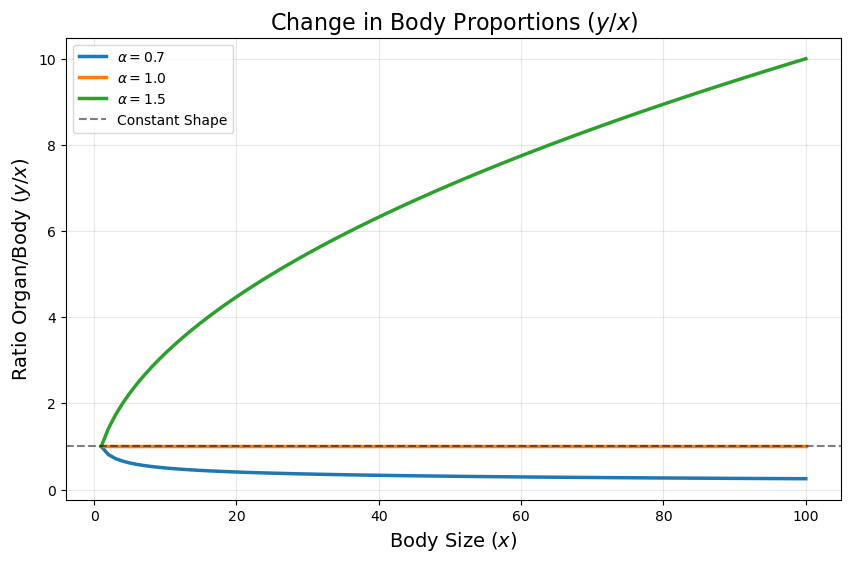

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))

for name, alpha in alphas.items():
    y_organ = allometric_equation(x_body, b, alpha)
    ratio = y_organ / x_body
    
    ax.plot(x_body, ratio, linewidth=2.5, label=f'$\\alpha={alpha}$')

ax.axhline(1.0, color='black', linestyle='--', alpha=0.5, label='Constant Shape')

ax.set_title('Change in Body Proportions ($y/x$)', fontsize=16)
ax.set_xlabel('Body Size ($x$)', fontsize=14)
ax.set_ylabel('Ratio Organ/Body ($y/x$)', fontsize=14)
ax.legend()
ax.grid(True, alpha=0.3)

plt.show()